In [ ]:
import pandas as pdimport matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Cargar el dataset final
data = pd.read_csv('only_english_dota2_chats.csv')

# Ver las primeras filas
print(data.head())

# Información general del dataset
print(data.info())

# Estadísticas básicas de las variables numéricas
print(data.describe())


    match        time  slot                     text             cleaned_text  \
0  954334   -26.06113     7                fist item                fist item   
1  756982    85.44562     9               new meta/)                 new meta   
2  925441  2173.20525     5      найс у нас керри гг      найс у нас керри гг   
3  946663  1507.19866     6           блять очкошная           блять очкошная   
4  244781  1298.58290     0  Dont be so nervous lion  Dont be so nervous lion   

                   text_en  is_english  
0                Fist item        True  
1                 new meta        True  
2      we've got kerry gg.        True  
3      Fuck, it's a point.        True  
4  Dont be so nervous lion        True  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73577 entries, 0 to 73576
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   match         73577 non-null  int64  
 1   time          73577 non-n

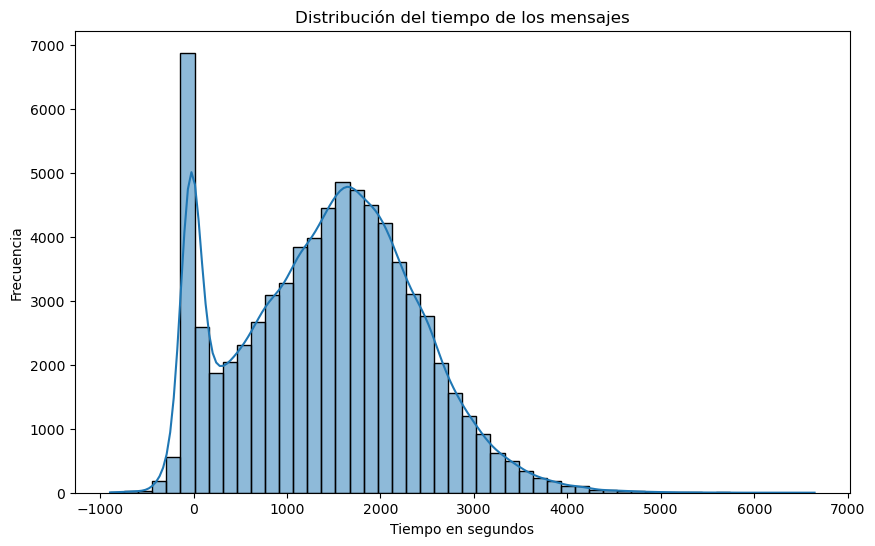

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma para visualizar la distribución del tiempo
plt.figure(figsize=(10, 6))
sns.histplot(data['time'], bins=50, kde=True)
plt.title('Distribución del tiempo de los mensajes')
plt.xlabel('Tiempo en segundos')
plt.ylabel('Frecuencia')
plt.show()


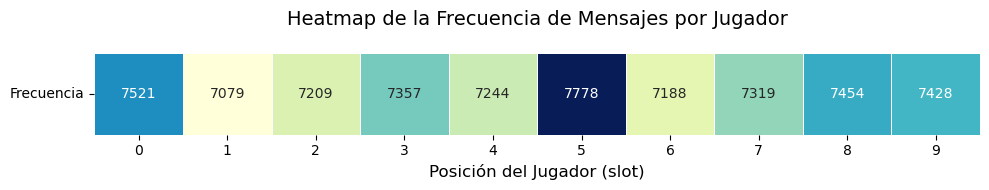

In [ ]:


# Calcular la frecuencia de mensajes por slot
slot_counts = data['slot'].value_counts().sort_index()

# Mapa de Calor Profesional sin leyenda
plt.figure(figsize=(10, 2))
sns.heatmap(
    slot_counts.values.reshape(1, -1),
    cmap='YlGnBu',
    annot=True,
    fmt='d',
    cbar=False,  # Eliminar la barra de color (leyenda)
    linewidths=0.5,
    linecolor='white',
    xticklabels=range(10),
    yticklabels=['Frecuencia']
)

plt.title('Heatmap de la Frecuencia de Mensajes por Jugador', fontsize=14, pad=20)
plt.xlabel('Posición del Jugador (slot)', fontsize=12)
plt.ylabel('')  # Eliminamos el texto redundante del eje Y
plt.yticks(rotation=0)  # Mantener las etiquetas horizontales
plt.tight_layout()

plt.show()


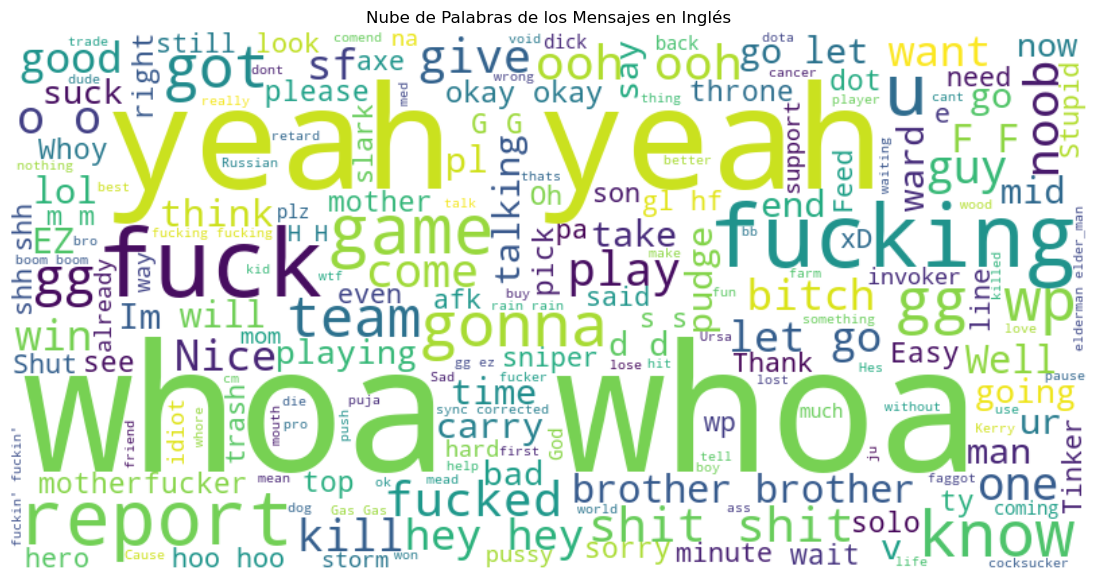

In [8]:
from wordcloud import WordCloud

# Unir todos los mensajes en una sola cadena de texto
all_text = ' '.join(data['text_en'].dropna())

# Generar la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Visualizar la nube de palabras
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de los Mensajes en Inglés')
plt.show()


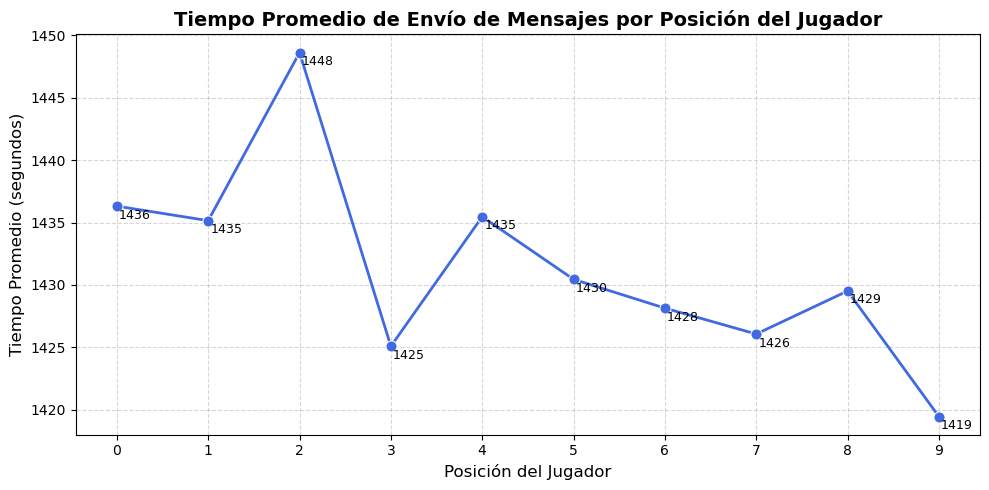

In [52]:
# Calcular el tiempo promedio por slot
avg_time_per_slot = data.groupby('slot')['time'].mean().reset_index()

# Gráfico de Línea Mejorado
plt.figure(figsize=(10, 5))
sns.lineplot(x='slot', y='time', data=avg_time_per_slot, marker='o', markersize=8, linewidth=2, color='royalblue')

# Personalización del gráfico
plt.title('Tiempo Promedio de Envío de Mensajes por Posición del Jugador', fontsize=14, weight='bold')
plt.xlabel('Posición del Jugador', fontsize=12)
plt.ylabel('Tiempo Promedio (segundos)', fontsize=12)
plt.grid(linestyle='--', alpha=0.5)

# ✅ Asegurar que el eje X muestre todos los números (sin saltos)
plt.xticks(ticks=range(data['slot'].min(), data['slot'].max() + 1))

# Ajustar etiquetas para que estén ligeramente abajo y a la derecha
for index, row in avg_time_per_slot.iterrows():
    plt.text(row['slot'] + 0.2, row['time'] - 1, f"{int(row['time'])}", 
             horizontalalignment='center', fontsize=9, color='black')

plt.tight_layout()  # Optimiza el ajuste de los elementos en la figura
plt.show()
